In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/video-game-sales-with-ratings/Video_Games_Sales_as_at_22_Dec_2016.csv


In [14]:
data = pd.read_csv('/kaggle/input/video-game-sales-with-ratings/Video_Games_Sales_as_at_22_Dec_2016.csv')
data= data[data['Year_of_Release']<2017.0]
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
data.shape

(16446, 16)

In [16]:
data.isnull().sum()

Name                  2
Platform              0
Year_of_Release       0
Genre                 2
Publisher            32
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8463
Critic_Count       8463
User_Score         6607
User_Count         8983
Developer          6540
Rating             6678
dtype: int64

In [17]:
data_sep = data.dropna()
data_sep.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


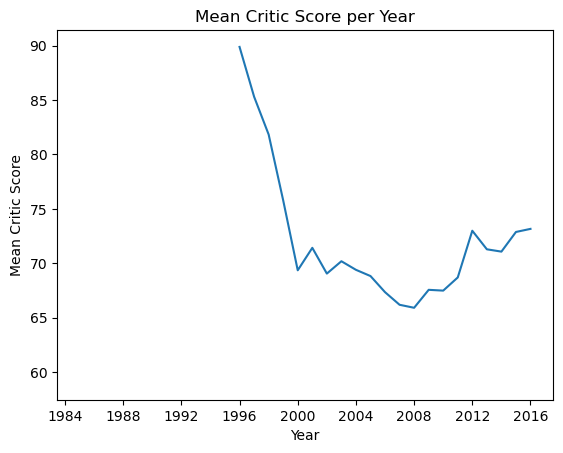

In [18]:
# Convert Year_of_Release column to datetime type
data['Year_of_Release'] = pd.to_datetime(data['Year_of_Release'], format='%Y')

# Compute the mean critic score for each year
mean_score_per_year = data.groupby('Year_of_Release')['Critic_Score'].mean()

# Plot the trend of mean critic score every year
plt.plot(mean_score_per_year.index, mean_score_per_year.values)

# Set the title and axis labels
plt.title('Mean Critic Score per Year')
plt.xlabel('Year')
plt.ylabel('Mean Critic Score')

# Show the plot
plt.show()

In [19]:
columnsToDrop= ['Critic_Score','Critic_Count','User_Score','User_Count','Developer','Rating']
data.drop(columnsToDrop, axis=1,inplace= True)

In [20]:
data = data.dropna()
data.isnull().sum()


Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
dtype: int64

In [21]:
data.shape

(16412, 10)

In [22]:
data.to_csv("clean_dataset.csv", index=False)

# Platform Related Analysis

In [23]:
data['Platform'].value_counts()

PS2     2127
DS      2121
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       952
XB       803
GBA      786
GC       542
3DS      512
PSV      427
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

<AxesSubplot:>

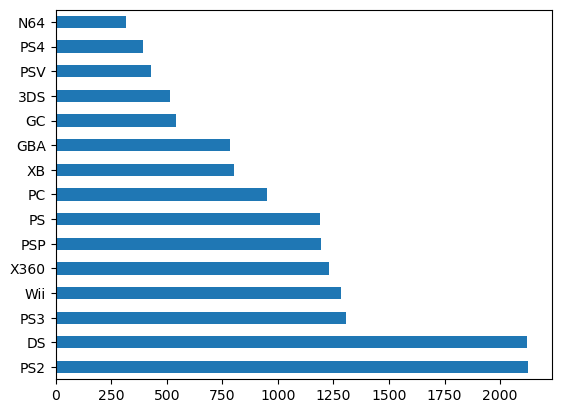

In [24]:
data['Platform'].value_counts()[:15].plot(kind='barh')

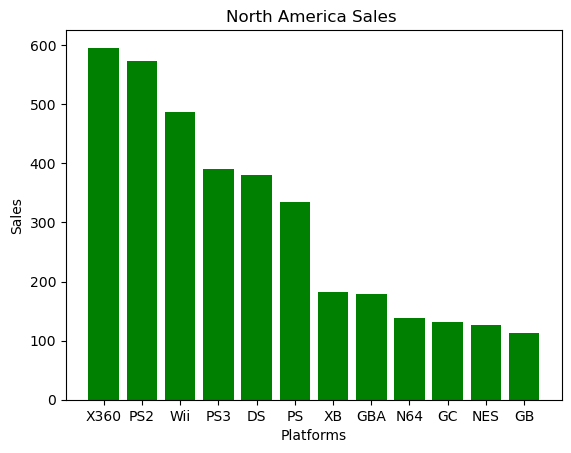

In [25]:
na_sales = data.groupby('Platform')['NA_Sales'].sum().reset_index()
na_res= na_sales.sort_values(('NA_Sales'),ascending= False).head(12)
plt.bar(na_res['Platform'],na_res['NA_Sales'], color='green')
plt.title('North America Sales ')
plt.xlabel('Platforms')
plt.ylabel('Sales')
plt.show()

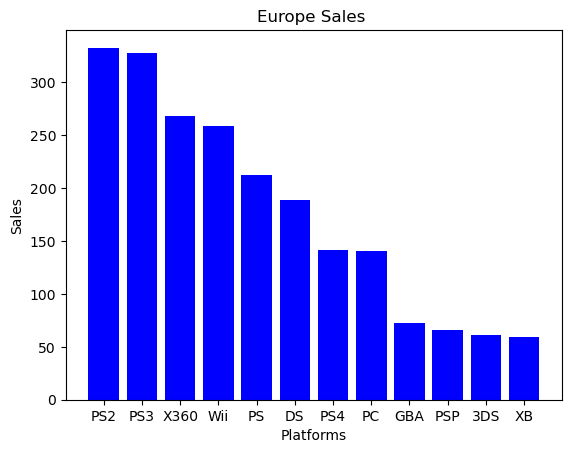

In [26]:
eu_sales = data.groupby('Platform')['EU_Sales'].sum().reset_index()
eu_res= eu_sales.sort_values(('EU_Sales'),ascending= False).head(12)
plt.bar(eu_res['Platform'],eu_res['EU_Sales'], color= 'blue')
plt.title('Europe Sales ')
plt.xlabel('Platforms')
plt.ylabel('Sales')
plt.show()

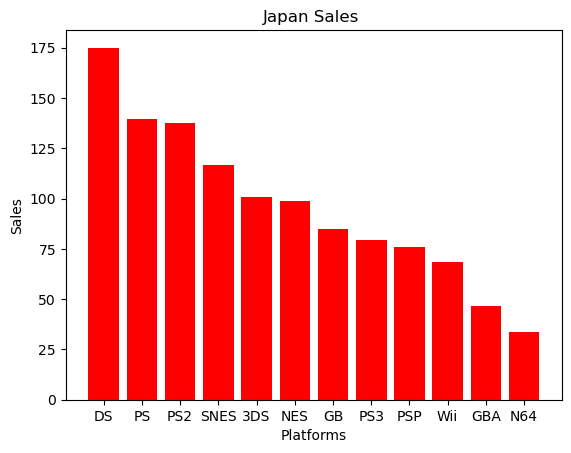

In [27]:
jp_sales = data.groupby('Platform')['JP_Sales'].sum().reset_index()
jp_res= jp_sales.sort_values(('JP_Sales'),ascending= False).head(12)
plt.bar(jp_res['Platform'],jp_res['JP_Sales'], color='red')
plt.title('Japan Sales ')
plt.xlabel('Platforms')
plt.ylabel('Sales')
plt.show()

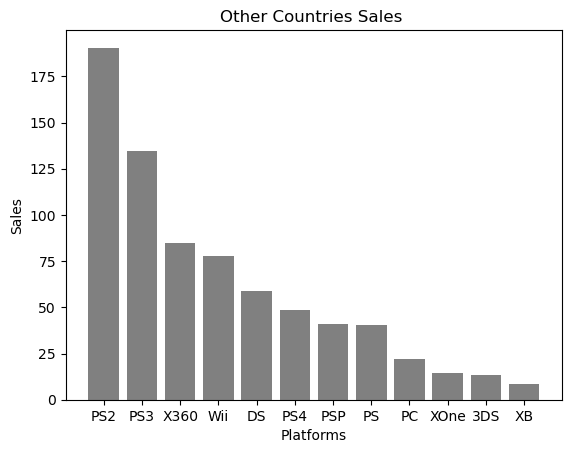

In [28]:
sales = data.groupby('Platform')['Other_Sales'].sum().reset_index()
res= sales.sort_values(('Other_Sales'),ascending= False).head(12)
plt.bar(res['Platform'],res['Other_Sales'], color='grey')
plt.title('Other Countries Sales ')
plt.xlabel('Platforms')
plt.ylabel('Sales')
plt.show()

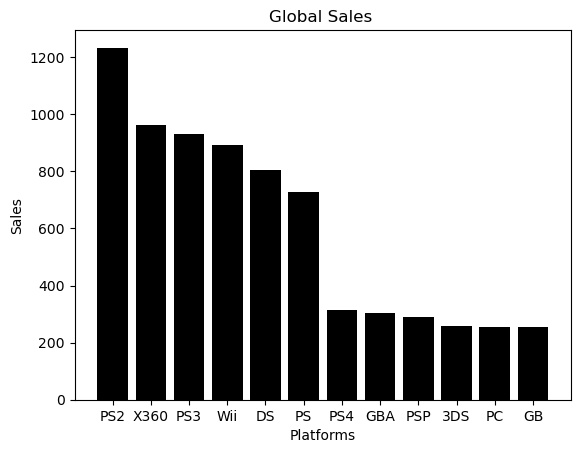

In [29]:
sales = data.groupby('Platform')['Global_Sales'].sum().reset_index()
res= sales.sort_values(('Global_Sales'),ascending= False).head(12)
plt.bar(res['Platform'],res['Global_Sales'], color='black')
plt.title('Global Sales ')
plt.xlabel('Platforms')
plt.ylabel('Sales')
plt.show()

Text(0.5, 1.0, "Platform's global sales")

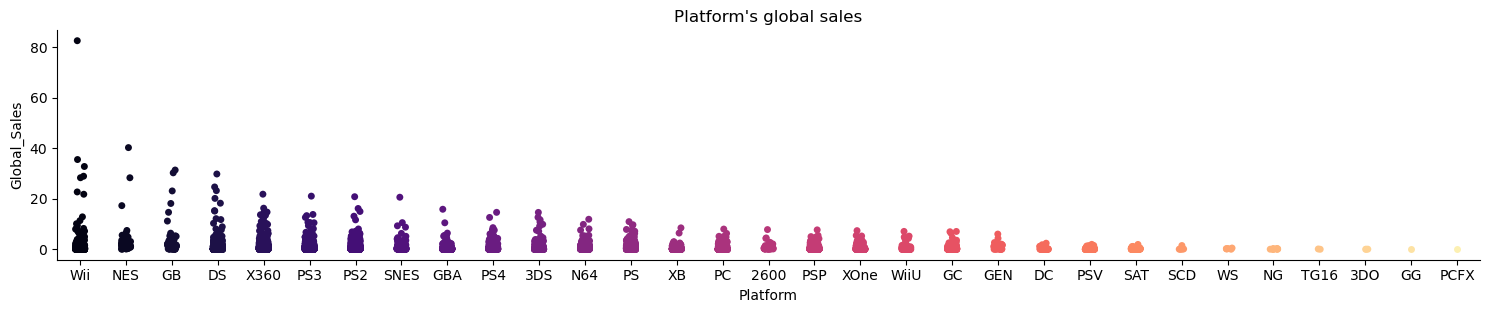

In [30]:
sns.catplot(data=data,x='Platform', y='Global_Sales',hue='Platform',palette='magma', height= 5, aspect= 3)
plt.gca().set_title('Platform\'s global sales')

# Publisher Based Analysis

In [31]:
data['Publisher'].value_counts()

Electronic Arts                 1344
Activision                       976
Namco Bandai Games               935
Ubisoft                          929
Konami Digital Entertainment     825
                                ... 
Max Five                           1
On Demand                          1
Bomb                               1
Detn8 Games                        1
Red Flagship                       1
Name: Publisher, Length: 579, dtype: int64

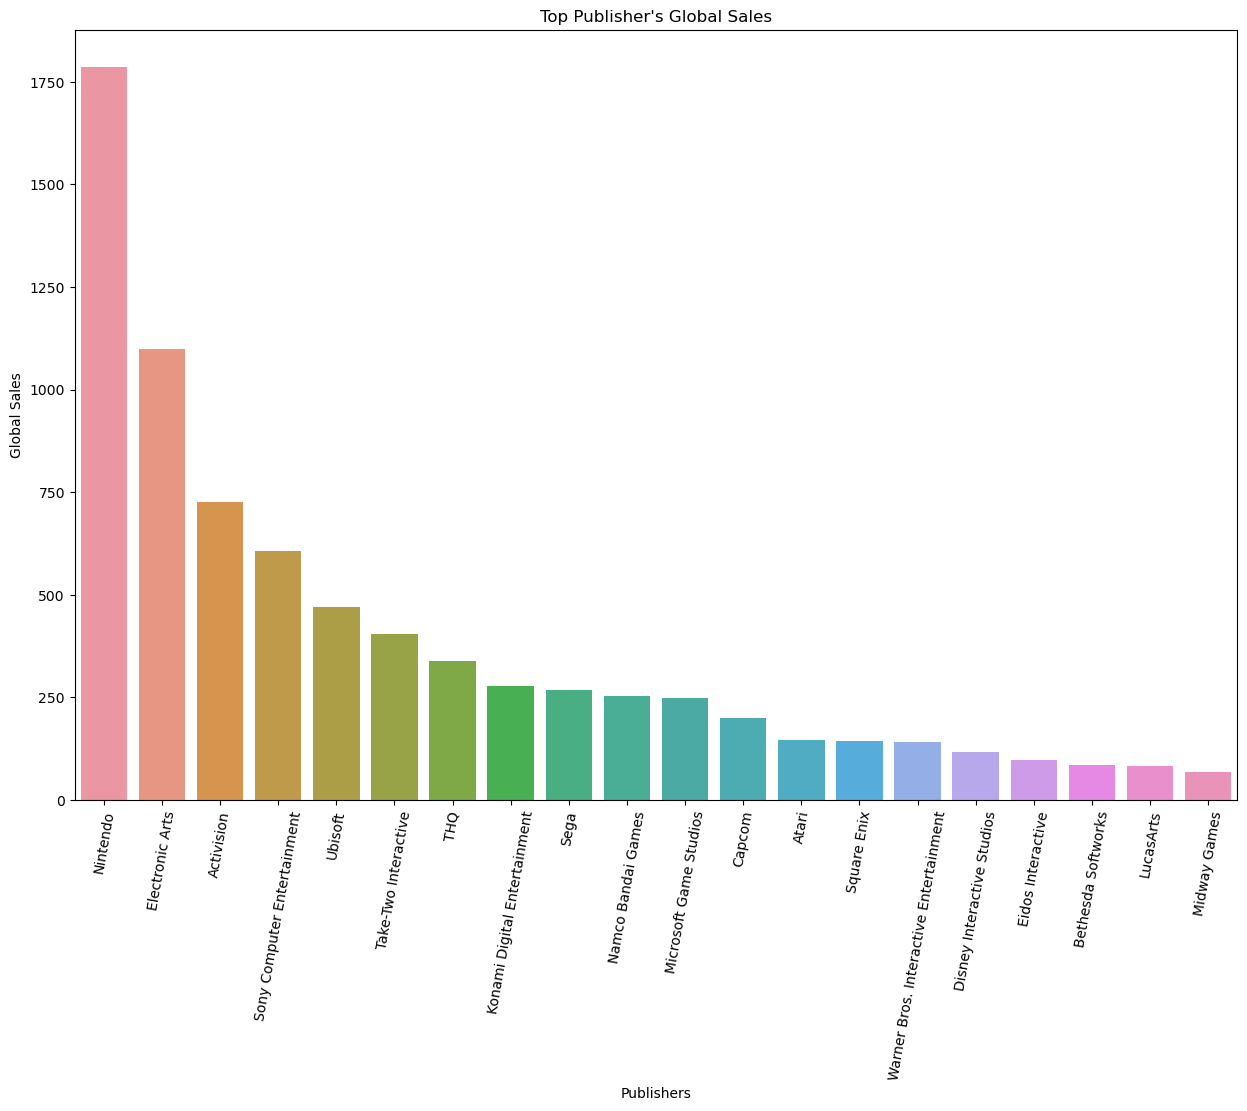

In [32]:
publishers= data.groupby('Publisher')['Global_Sales'].sum()
publishers= publishers.sort_values(ascending=False).head(20)
plt.figure(figsize=(15,10))
sns.barplot(x=publishers.index, y=publishers.values)
plt.xticks(rotation=80)
plt.title('Top Publisher\'s Global Sales')
plt.xlabel('Publishers')
plt.ylabel('Global Sales')
plt.show()


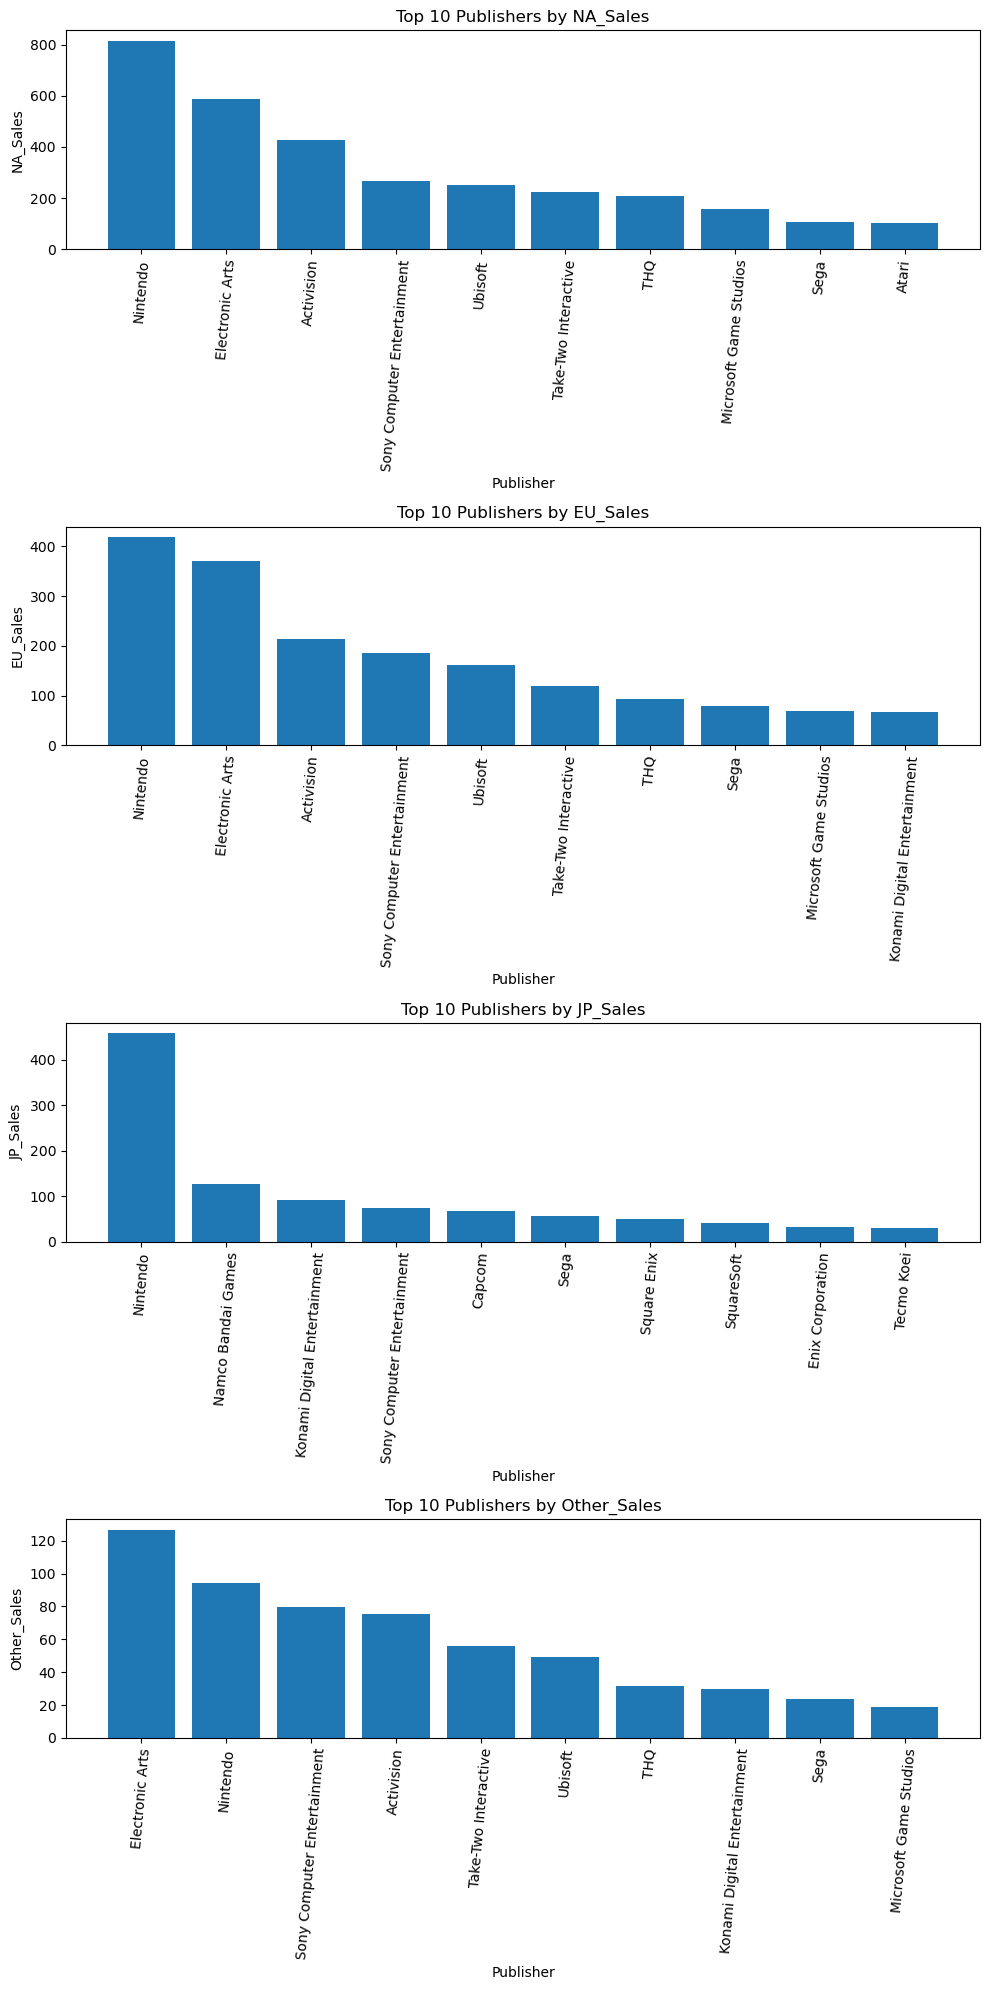

In [33]:
fig, axs = plt.subplots(4, 1, figsize=(10, 20))

sales = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

for i, s in enumerate(sales):
    axs[i].bar(data.groupby('Publisher')[s].sum().sort_values(ascending=False)[:10].index,
               data.groupby('Publisher')[s].sum().sort_values(ascending=False)[:10].values)
    axs[i].set_title('Top 10 Publishers by ' + s)
    axs[i].set_xlabel('Publisher')
    axs[i].set_ylabel(s)
    axs[i].tick_params(axis='x', rotation=85)

plt.tight_layout()
plt.show()

# Genre Based Analysis

In [34]:
data['Genre'].value_counts()

Action          3306
Sports          2306
Misc            1697
Role-Playing    1481
Shooter         1296
Adventure       1291
Racing          1225
Platform         878
Simulation       854
Fighting         837
Strategy         672
Puzzle           569
Name: Genre, dtype: int64

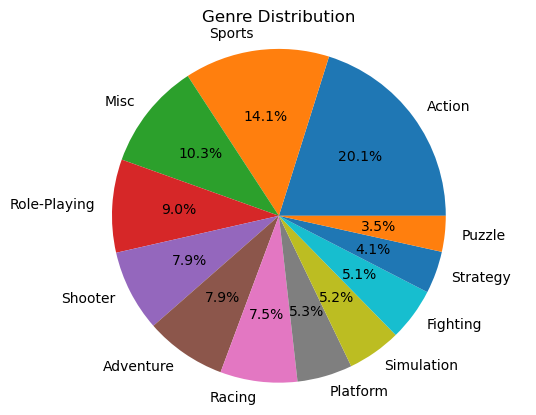

In [35]:
genres = data['Genre'].value_counts()
labels = genres.index.tolist()
count = genres.values.tolist()

plt.pie(count, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Genre Distribution')
plt.show()


<AxesSubplot:>

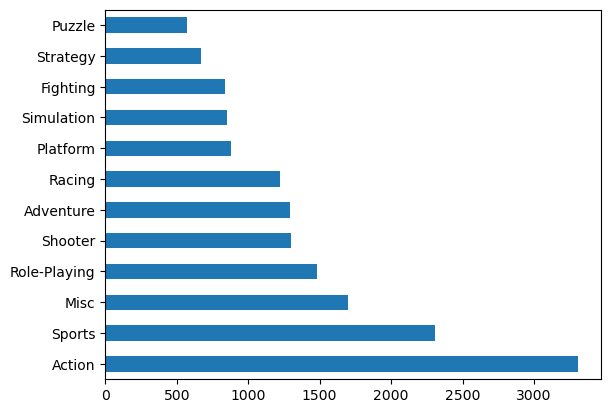

In [36]:
data['Genre'].value_counts().plot(kind = 'barh')


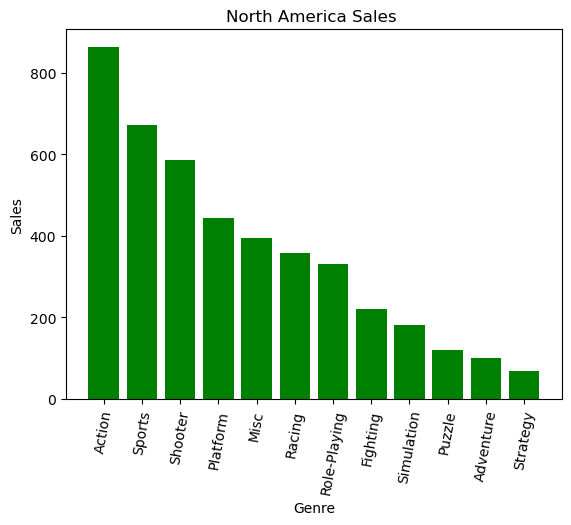

In [37]:
na_sales = data.groupby('Genre')['NA_Sales'].sum().reset_index()
na_res= na_sales.sort_values(('NA_Sales'),ascending= False)
plt.bar(na_res['Genre'],na_res['NA_Sales'], color='green')
plt.title('North America Sales ')
plt.xlabel('Genre')
plt.ylabel('Sales')
plt.xticks(rotation = 80)
plt.show()

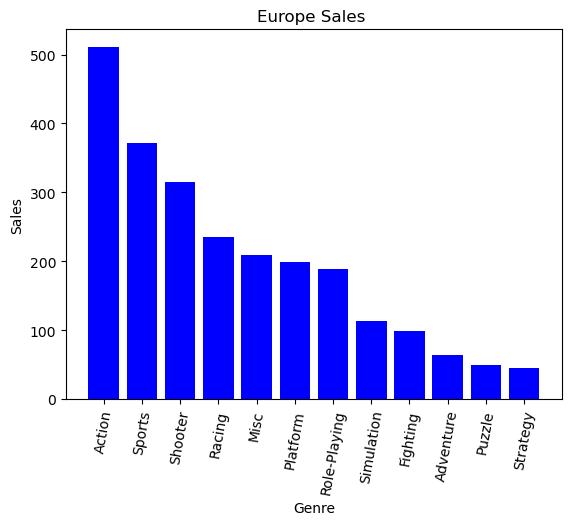

In [38]:
eu_sales = data.groupby('Genre')['EU_Sales'].sum().reset_index()
eu_res= eu_sales.sort_values(('EU_Sales'),ascending= False)
plt.bar(eu_res['Genre'],eu_res['EU_Sales'], color= 'blue')
plt.title('Europe Sales ')
plt.xlabel('Genre')
plt.ylabel('Sales')
plt.xticks(rotation = 80)
plt.show()

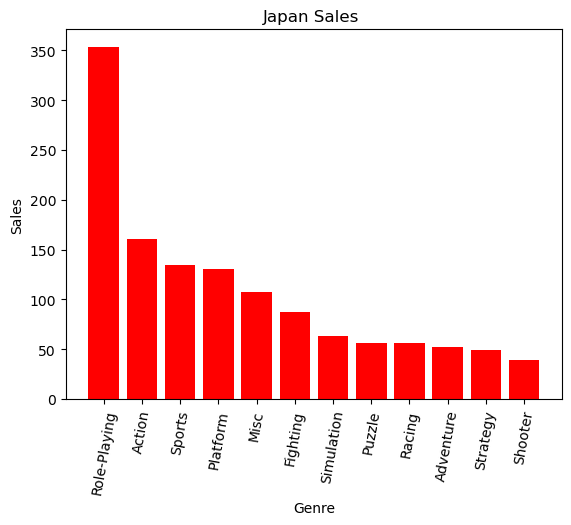

In [39]:
jp_sales = data.groupby('Genre')['JP_Sales'].sum().reset_index()
jp_res= jp_sales.sort_values(('JP_Sales'),ascending= False)
plt.bar(jp_res['Genre'],jp_res['JP_Sales'], color='red')
plt.title('Japan Sales ')
plt.xlabel('Genre')
plt.ylabel('Sales')
plt.xticks(rotation = 80)
plt.show()

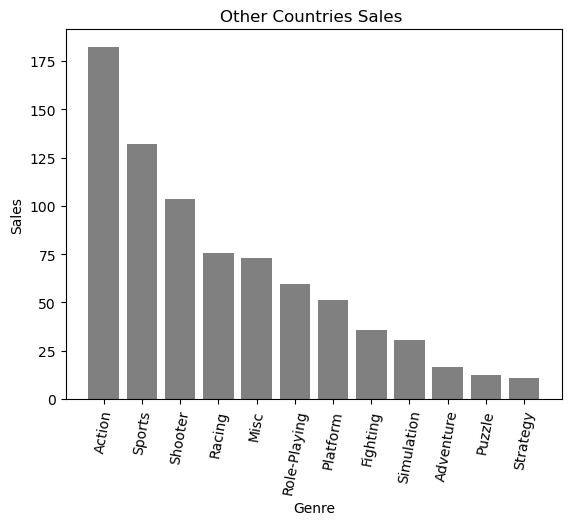

In [40]:
sales = data.groupby('Genre')['Other_Sales'].sum().reset_index()
res= sales.sort_values(('Other_Sales'),ascending= False)
plt.bar(res['Genre'],res['Other_Sales'], color='grey')
plt.title('Other Countries Sales ')
plt.xlabel('Genre')
plt.ylabel('Sales')
plt.xticks(rotation = 80)
plt.show()

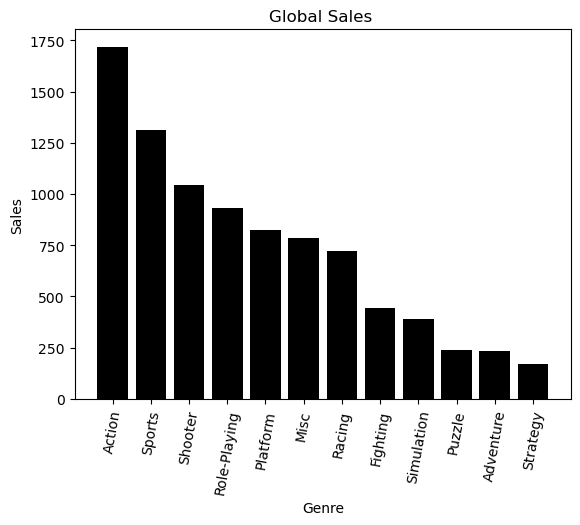

In [41]:
sales = data.groupby('Genre')['Global_Sales'].sum().reset_index()
res= sales.sort_values(('Global_Sales'),ascending= False)
plt.bar(res['Genre'],res['Global_Sales'], color='black')
plt.title('Global Sales ')
plt.xlabel('Genre')
plt.ylabel('Sales')
plt.xticks(rotation = 80)
plt.show()

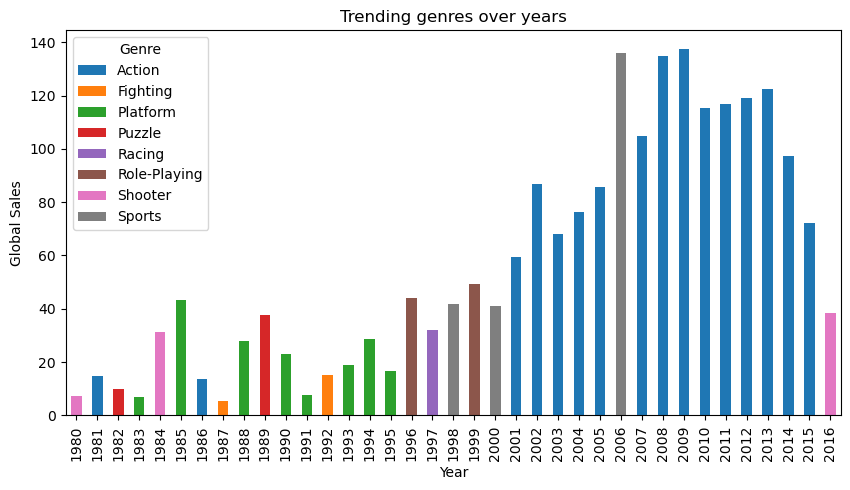

In [42]:


# Convert the Year_of_Release column to a datetime type
data['Year_of_Release'] = pd.to_datetime(data['Year_of_Release'])

# Group the data by year and genre, and sum the Global_Sales column
grouped = data.groupby(['Year_of_Release', 'Genre'])['Global_Sales'].sum().reset_index()

# Find the genre with the highest sales for each year
idx = grouped.groupby(['Year_of_Release'])['Global_Sales'].transform(max) == grouped['Global_Sales']

# Filter the data to include only the highest selling genre for each year
top_genre_by_year = grouped[idx]

# Pivot the data to create a table with the years as rows and the genres as columns
pivoted = top_genre_by_year.pivot(index='Year_of_Release', columns='Genre', values='Global_Sales')

# Plot the data as a stacked bar plot
pivoted.plot.bar(stacked=True, figsize=(10, 5))

# Set the title and axis labels
x_tick_labels = ['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016']
plt.gca().set_xticklabels(x_tick_labels)
plt.title('Trending genres over years')
plt.xlabel('Year')
plt.ylabel('Global Sales')

# Show the plot
plt.show()


# Games


In [43]:
data['Name'].nunique

<bound method IndexOpsMixin.nunique of 0                           Wii Sports
1                    Super Mario Bros.
2                       Mario Kart Wii
3                    Wii Sports Resort
4             Pokemon Red/Pokemon Blue
                     ...              
16714    Samurai Warriors: Sanada Maru
16715                 LMA Manager 2007
16716          Haitaka no Psychedelica
16717                 Spirits & Spells
16718              Winning Post 8 2016
Name: Name, Length: 16412, dtype: object>

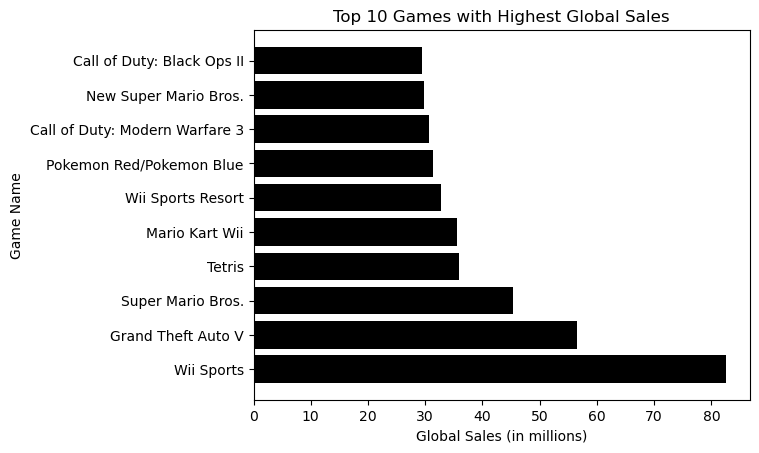

In [44]:

# Group the data by game name and sum the global sales
top_games = data.groupby('Name')['Global_Sales'].sum().reset_index()

# Sort the games in descending order by their global sales and take the top 10
top_games = top_games.sort_values('Global_Sales', ascending=False).head(10)

# Create the horizontal bar plot
plt.barh(top_games['Name'], top_games['Global_Sales'], color = 'black')

# Set the title and axis labels
plt.title('Top 10 Games with Highest Global Sales')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Game Name')

# Show the plot
plt.show()






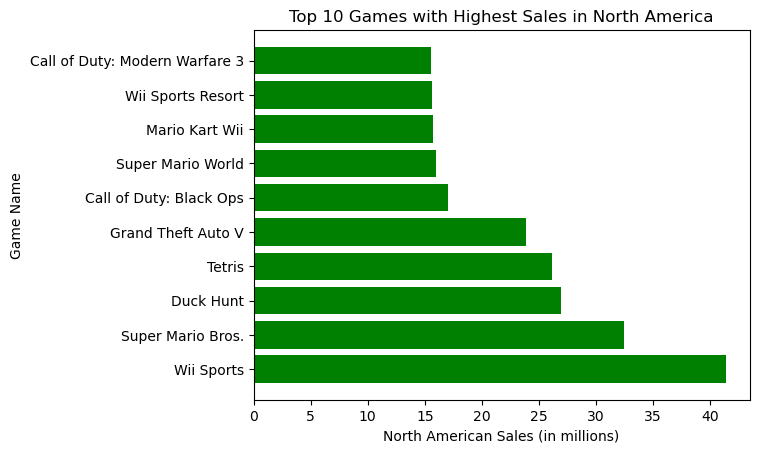

In [45]:

# Group the data by game name and sum the NA sales
top_games = data.groupby('Name')['NA_Sales'].sum().reset_index()

# Sort the games in descending order by their NA sales and take the top 10
top_games = top_games.sort_values('NA_Sales', ascending=False).head(10)

# Create the horizontal bar plot
plt.barh(top_games['Name'], top_games['NA_Sales'], color='green')

# Set the title and axis labels
plt.title('Top 10 Games with Highest Sales in North America')
plt.xlabel('North American Sales (in millions)')
plt.ylabel('Game Name')

# Show the plot
plt.show()


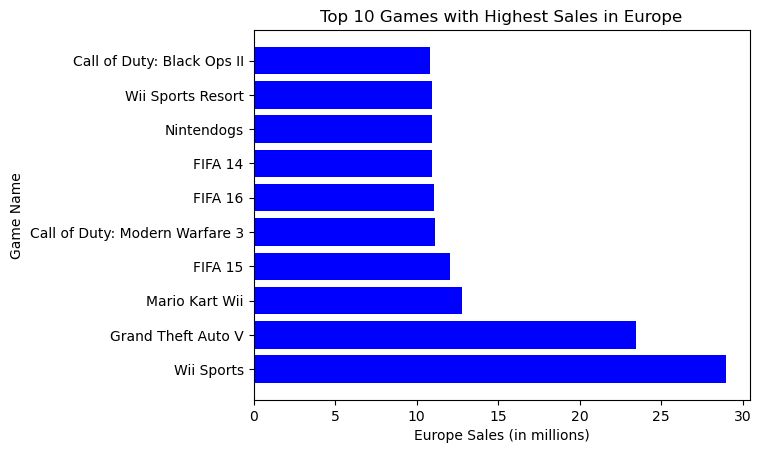

In [46]:

# Group the data by game name and sum the NA sales
top_games = data.groupby('Name')['EU_Sales'].sum().reset_index()

# Sort the games in descending order by their NA sales and take the top 10
top_games = top_games.sort_values('EU_Sales', ascending=False).head(10)

# Create the horizontal bar plot
plt.barh(top_games['Name'], top_games['EU_Sales'], color= 'blue')

# Set the title and axis labels
plt.title('Top 10 Games with Highest Sales in Europe')
plt.xlabel('Europe Sales (in millions)')
plt.ylabel('Game Name')

# Show the plot
plt.show()

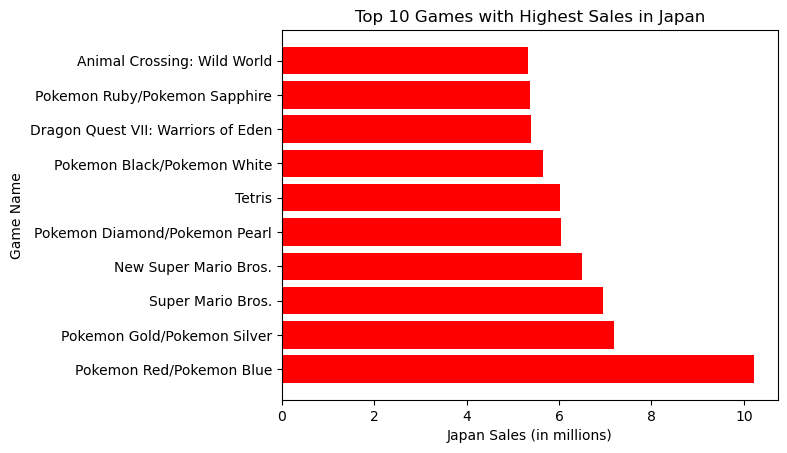

In [47]:

# Group the data by game name and sum the EU sales
top_games = data.groupby('Name')['JP_Sales'].sum().reset_index()

# Sort the games in descending order by their EU sales and take the top 10
top_games = top_games.sort_values('JP_Sales', ascending=False).head(10)

# Create the horizontal bar plot
plt.barh(top_games['Name'], top_games['JP_Sales'], color= 'red')

# Set the title and axis labels
plt.title('Top 10 Games with Highest Sales in Japan')
plt.xlabel('Japan Sales (in millions)')
plt.ylabel('Game Name')

# Show the plot
plt.show()

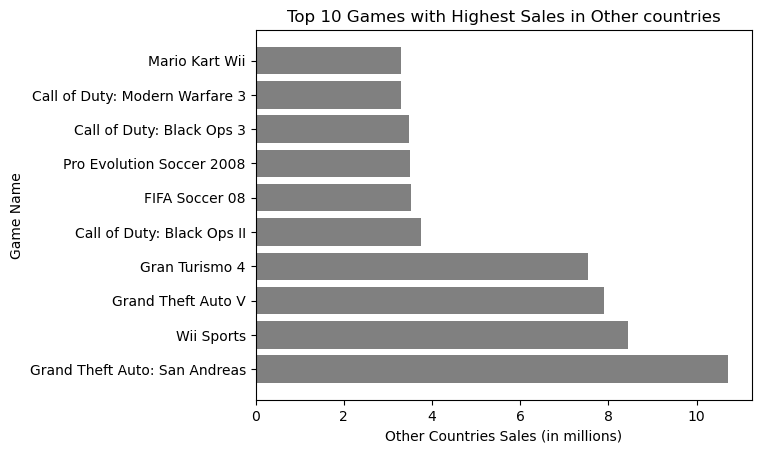

In [48]:

# Group the data by game name and sum the NA sales
top_games = data.groupby('Name')['Other_Sales'].sum().reset_index()

# Sort the games in descending order by their NA sales and take the top 10
top_games = top_games.sort_values('Other_Sales', ascending=False).head(10)

# Create the horizontal bar plot
plt.barh(top_games['Name'], top_games['Other_Sales'], color='grey')

# Set the title and axis labels
plt.title('Top 10 Games with Highest Sales in Other countries')
plt.xlabel('Other Countries Sales (in millions)')
plt.ylabel('Game Name')

# Show the plot
plt.show()

<AxesSubplot:>

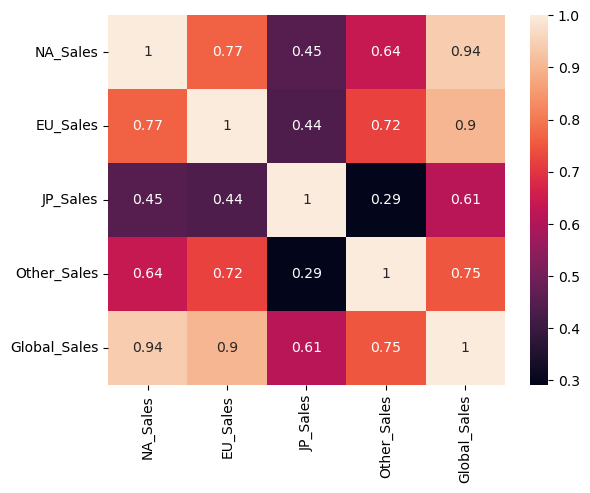

In [49]:
sales_features = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
sales_data = data[sales_features]

corr_matrix = sales_data.corr()

sns.heatmap(corr_matrix, annot=True)

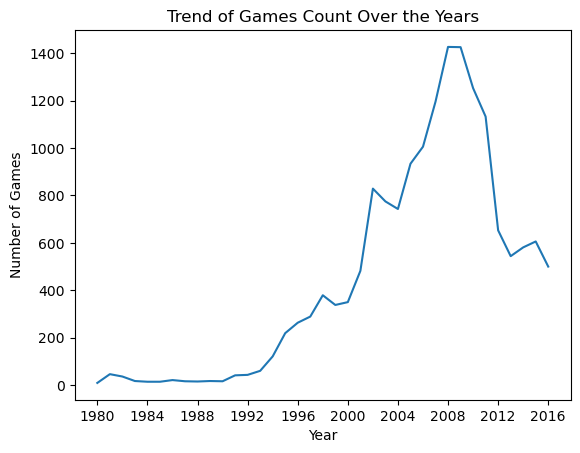

In [50]:


# Convert the Year_of_Release column to a datetime type
data['Year_of_Release'] = pd.to_datetime(data['Year_of_Release'], format='%Y')

# Group the data by year and count the number of games released each year
games_per_year = data.groupby(['Year_of_Release'])['Name'].count()

# Plot the trend of games count over the years
plt.plot(games_per_year.index, games_per_year.values)

# Set the title and axis labels
plt.title('Trend of Games Count Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Games')

# Show the plot
plt.show()


In [51]:

earliest_year = data['Year_of_Release'].min()
print(earliest_year)


1980-01-01 00:00:00
